Importing Libraies

In [245]:
library(tidyverse)
library(dplyr)
library(psych)
library(knitr)
library(pander)
library(ggplot2)
library(gridExtra)
library(scales)
library(ggcorrplot)
library(tinytex)
options(warn=-1)

### Loading dataset

In [246]:
colleges <- read.csv("./ForbesAmericasTopColleges2019.csv")

### 1. Understanding the data

In [247]:
dim(colleges)

[1] 650  17

There are 650 colleges with 17 different attributes (before cleaning).

In [248]:
head(colleges)

Rank Name                                  City         State Public.Private
1 1    Harvard University                    Cambridge    MA    Private       
2 2    Stanford University                   Stanford     CA    Private       
3 3    Yale University                       New Haven    CT    Private       
4 4    Massachusetts Institute of Technology Cambridge    MA    Private       
5 5    Princeton University                  Princeton    NJ    Private       
6 6    University of Pennsylvania            Philadelphia PA    Private       
  Undergraduate.Population Student.Population Net.Price Average.Grant.Aid
1 13844                    31120              14327     49870            
2  8402                    17534              13261     50134            
3  6483                    12974              18627     50897            
4  4680                    11466              20771     43248            
5  5659                     8273               9327     48088            
6 13437                    25367              24242     44801            
  Total.Annual.Cost Alumni.Salary Acceptance.Rate SAT.Lower SAT.Upper ACT.Lower
1 69600             146800        5               1460      1590      32       
2 69109             145200        5               1390      1540      32       
3 71290             138300        7               1460      1580      32       
4 67430             155200        7               1490      1570      33       
5 66150             139400        6               1430      1570      31       
6 71715             133900        9               1420      1560      32       
  ACT.Upper Website          
1 35        www.harvard.edu  
2 35        www.stanford.edu 
3 35        www.yale.edu     
4 35        web.mit.edu      
5 35        www.princeton.edu
6 35        www.upenn.edu

In [249]:
tail(colleges)

Rank Name                        City        State Public.Private
645 645  Morehouse College           Atlanta     GA    Private       
646 646  New Mexico State University Las Cruces  NM    Public        
647 647  Indiana State University    Terre Haute IN    Public        
648 648  Emory &amp; Henry College   Emory       VA    Private       
649 649  Wells College               Aurora      NY    Private       
650 650  Catawba College             Salisbury   NC    Private       
    Undergraduate.Population Student.Population Net.Price Average.Grant.Aid
645  2202                     2219              34928     17318            
646 13379                    14432               8625      9582            
647 13626                    13763              13012      9297            
648  1094                     1226              19340     27155            
649   488                      516              22828     30207            
650  1336                     1463              19807     23662            
    Total.Annual.Cost Alumni.Salary Acceptance.Rate SAT.Lower SAT.Upper
645 48723             98700         74              950       1160     
646 34720             96700         64              910       1160     
647 32938             85600         85              900       1110     
648 48100             70700         72              988       1170     
649 55180                NA         80               NA         NA     
650 44921             78100         42              930       1100     
    ACT.Lower ACT.Upper Website                  
645 18        23        https://www.morehouse.edu
646 18        23        www.nmsu.edu             
647 17        23        www.indstate.edu         
648 19        25        www.ehc.edu              
649 NA        NA        www.wells.edu            
650 18        23        www.catawba.edu

In [250]:
columns <- colnames(colleges)

for (name in columns) {  
    cat(name, ':', length(unique(colleges[[name]])), "\n")
}

Rank : 650 
Name : 650 
City : 470 
State : 51 
Public.Private : 2 
Undergraduate.Population : 623 
Student.Population : 639 
Net.Price : 639 
Average.Grant.Aid : 640 
Total.Annual.Cost : 644 
Alumni.Salary : 355 
Acceptance.Rate : 94 
SAT.Lower : 98 
SAT.Upper : 91 
ACT.Lower : 21 
ACT.Upper : 17 
Website : 646 


### 2. Cleaning the data

Removing columns we will not focus on and finding null values

In [251]:
check_null_values <- function(dataset) {
    columns <- colnames(dataset)

    for (name in columns) {
        cat(name, ":", sum(is.na(dataset[[name]]) | dataset[[name]] == ""), "\n")
    }
}

check_null_values(colleges)

Rank : 0 
Name : 0 
City : 3 
State : 0 
Public.Private : 0 
Undergraduate.Population : 0 
Student.Population : 0 
Net.Price : 2 
Average.Grant.Aid : 4 
Total.Annual.Cost : 0 
Alumni.Salary : 15 
Acceptance.Rate : 2 
SAT.Lower : 99 
SAT.Upper : 99 
ACT.Lower : 97 
ACT.Upper : 97 
Website : 5 


Columns that are not relevant to this analysis: City, State, SAT score, ACT scores & website address

In [252]:
colleges <- within(colleges, rm("City","State", "SAT.Lower","SAT.Upper","ACT.Lower","ACT.Upper", "Website"))

Now we are left with the columns we will analyze

In [253]:
head(colleges, 3)

Rank Name                Public.Private Undergraduate.Population
1 1    Harvard University  Private        13844                   
2 2    Stanford University Private         8402                   
3 3    Yale University     Private         6483                   
  Student.Population Net.Price Average.Grant.Aid Total.Annual.Cost
1 31120              14327     49870             69600            
2 17534              13261     50134             69109            
3 12974              18627     50897             71290            
  Alumni.Salary Acceptance.Rate
1 146800        5              
2 145200        5              
3 138300        7

In [254]:
check_null_values(colleges)

Rank : 0 
Name : 0 
Public.Private : 0 
Undergraduate.Population : 0 
Student.Population : 0 
Net.Price : 2 
Average.Grant.Aid : 4 
Total.Annual.Cost : 0 
Alumni.Salary : 15 
Acceptance.Rate : 2 


### 3. Analysis

#### Heat Map

In [ ]:
colleges %>% select(-Name,-Public.Private) %>%
  cor(use="pairwise.complete.obs") %>% 
  ggcorrplot(show.diag = FALSE, lab=TRUE, lab_size=2, 
             title = "Correlation Matrix for America's Top Colleges",
             hc.order = FALSE, digits = 4)+
  theme(axis.text.x = element_text(size=rel(0.8), angle = 90), axis.text.y = element_text(size=rel(0.8)))


 - Correlation matrix gives a picture of how strong/weak the parameters in the study are related. This can give us an idea of which parameter to drop in the analysis stage.

3.1 What can we find between the relationship of the Rank and Student Population within these colleges

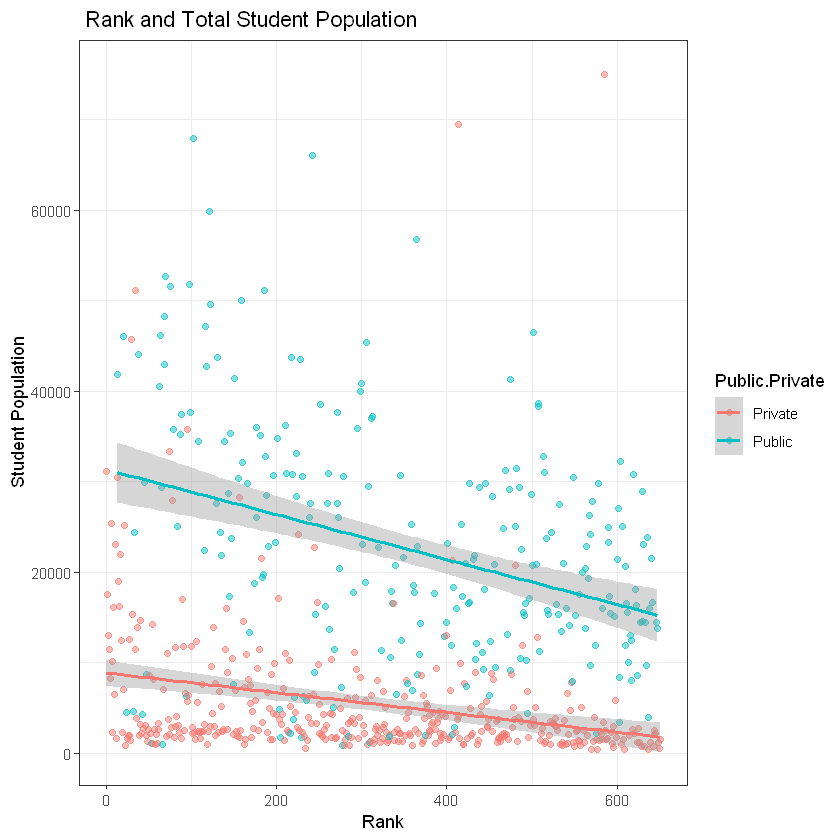

In [255]:
 Figure_2 <- colleges %>% ggplot(aes(x = Rank, y = Student.Population, colour = Public.Private )) + 
  geom_point(alpha = 0.5) + theme_bw() + ylab('Student Population') +
  xlab('Rank')+ geom_smooth(method = 'lm', formula = 'y~x')+
  ggtitle(' Rank and Total Student Population')
  Figure_2


Some information we can gather from this graph:

- The lower the ranking, the lower the Student Population
- Higher ranked colleges have higher Student Populations
- Overall, Public colleges have higher Student Populations

3.2 How does a college's Rank and Acceptance Rate relate?

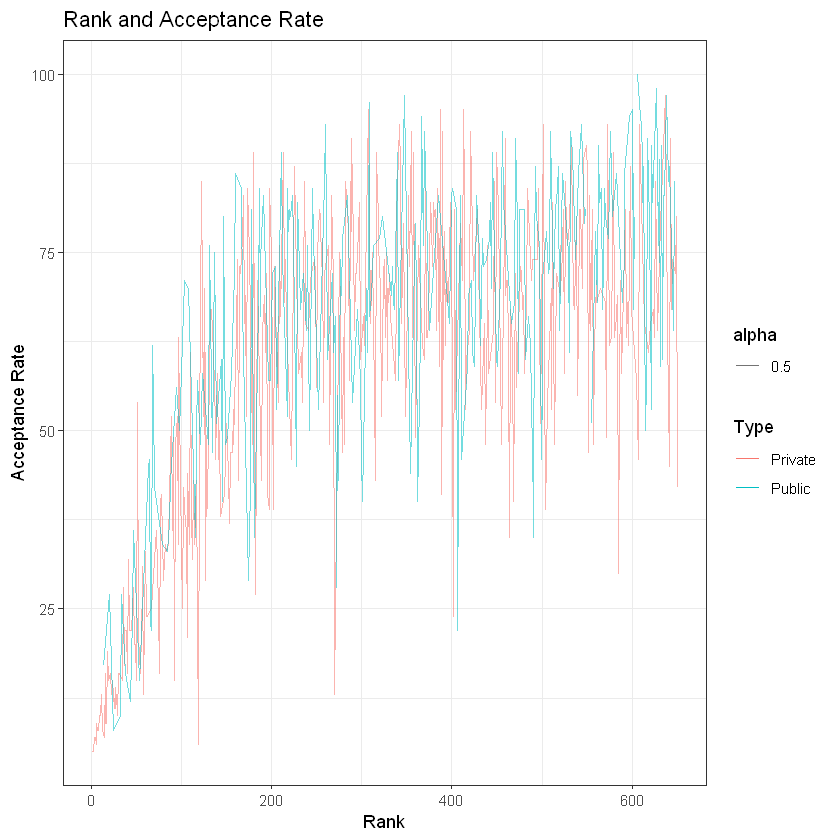

In [256]:
figure_0 <- colleges %>% 
  ggplot(aes(x = Rank, y = Acceptance.Rate , color = Public.Private)) +
  geom_line(aes(alpha =0.5)) + theme_bw() + ylab('Acceptance Rate') +
  xlab('Rank') + labs(color = 'Type') +
 ggtitle("Rank and Acceptance Rate")
 figure_0

This shows that colleges that are ranked lower have higher acceptance rates & we can see how that differs between Private vs. Public colleges.

3.3 What relationship can we find between Rank and Cost?

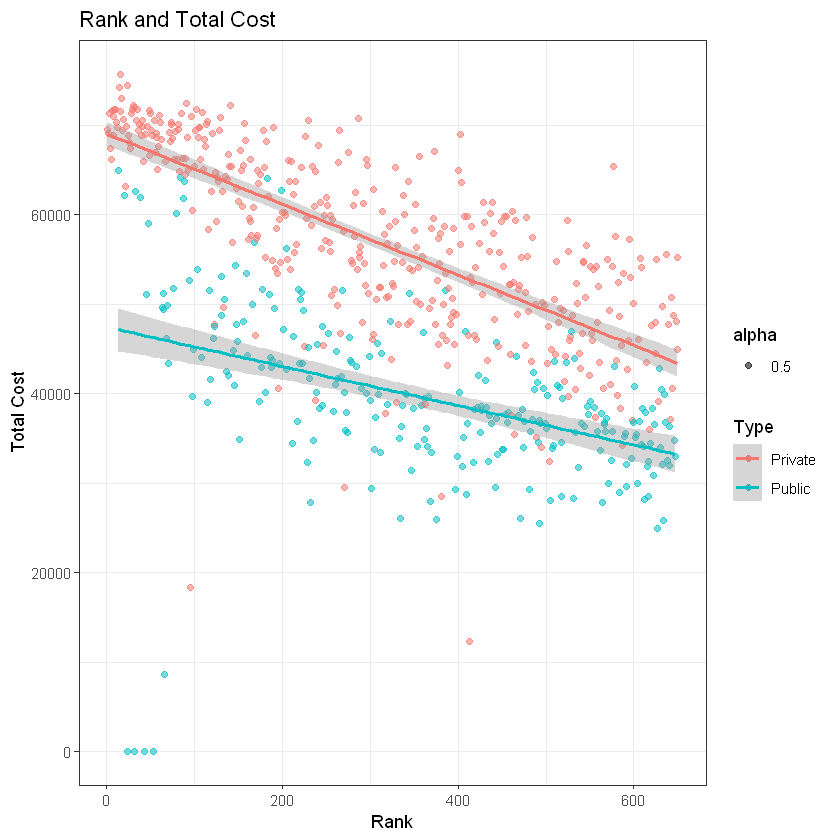

In [257]:
figure_1 <- colleges  %>% 
    ggplot(aes(x =Rank , y = Total.Annual.Cost , color = Public.Private)) + 
    geom_point(aes(alpha = 0.5)) + theme_bw() + ylab('Total Cost') +
    xlab('Rank') + labs(color = 'Type') + 
    geom_smooth(method = 'lm', formula = 'y~x')+ guides(shape = "none") +
  ggtitle("Rank and Total Cost")
  figure_1

Overall, we notice that higher ranked colleges have higher Total Annual Cost, and there is a decrease in cost as our x-value goes further to the right (as the college's rank becomes lower).

3.4 How do Total Annual Cost and Average Grant Aid relate?

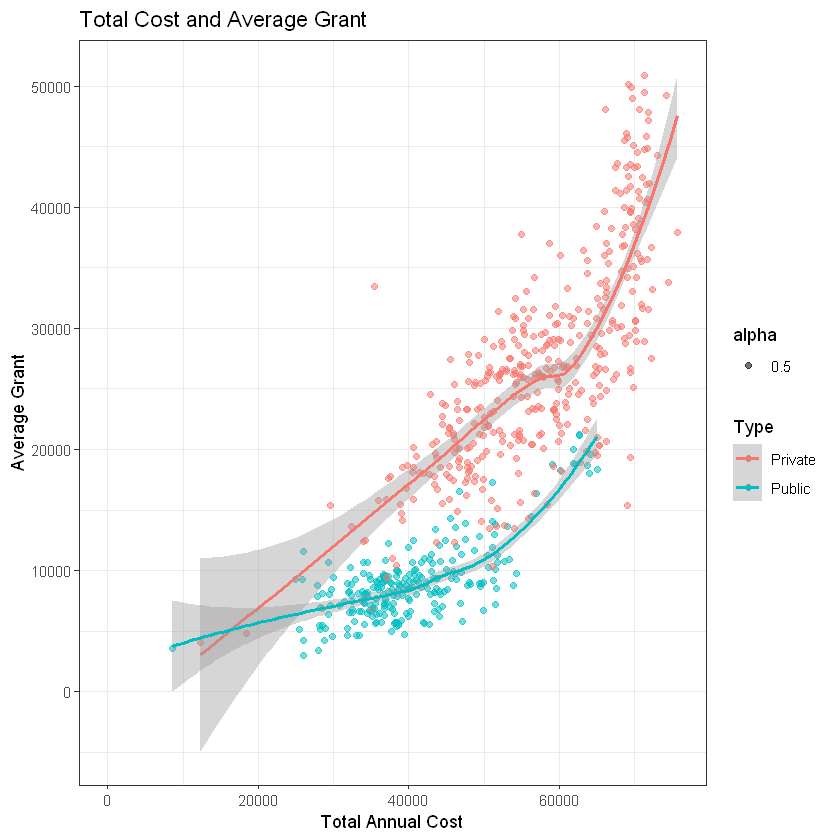

In [258]:
figure_4 <- colleges  %>% 
    ggplot(aes(x = Total.Annual.Cost, y = Average.Grant.Aid, color = Public.Private )) + 
  geom_point(aes(alpha = 0.5)) + theme_bw() + ylab('Average Grant') +
    xlab('Total Annual Cost') + labs(color = 'Type') + 
    geom_smooth(method = 'loess', formula = 'y~x')+ guides(shape = "none")+
ggtitle("Total Cost and Average Grant")
figure_4

From the scatterplot, we can conclude that colleges with a higher Total Annual Cost have more Average Grant Aid.

3.6 The relationship between rank and average grant and also rank and alumni salary

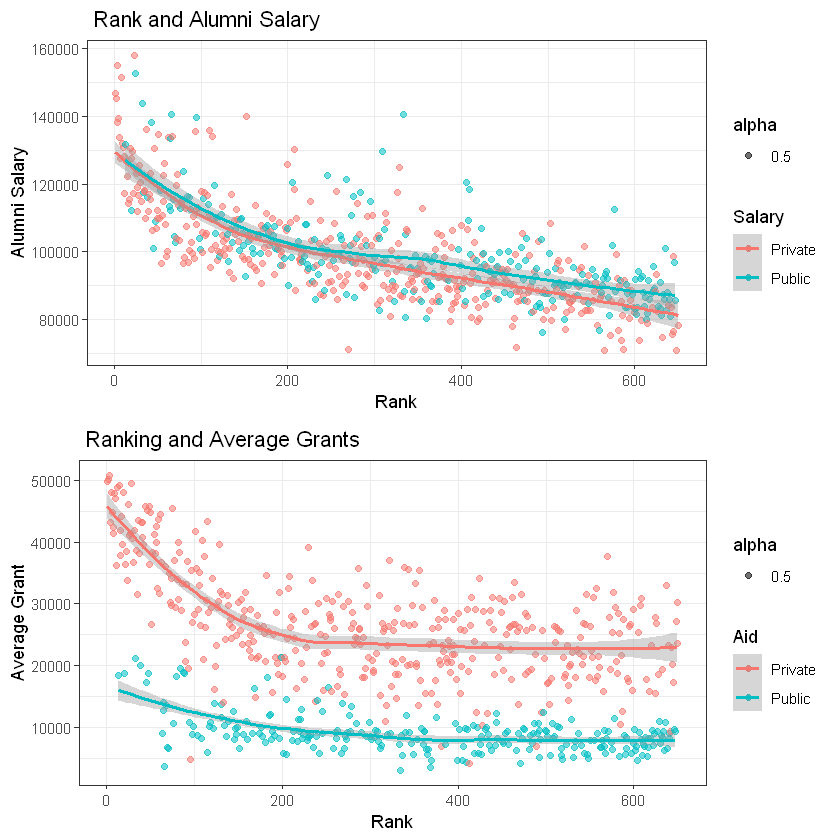

In [ ]:
figure_6 <- colleges  %>% 
    ggplot(aes(x = Rank, y = Average.Grant.Aid, color = Public.Private )) + 
  geom_point(aes(alpha = 0.5)) + theme_bw() + ylab('Average Grant') +
    xlab('Rank') + labs(color = 'Aid') + 
    geom_smooth(method = 'loess', formula = 'y~x')+ guides(shape = "none")+
    ggtitle(" Ranking and Average Grants")

figure_5 <- colleges  %>% 
    ggplot(aes(x = Rank, y = Alumni.Salary, color = Public.Private )) + 
  geom_point(aes(alpha = 0.5)) + theme_bw() + ylab('Alumni Salary') +
    xlab('Rank') + labs(color = 'Salary') + 
    geom_smooth(method = 'loess', formula = 'y~x')+ guides(shape = "none")+
      ggtitle(" Rank and Alumni Salary  ")

grid.arrange(figure_5,figure_6, nrow = 2)

 Salaries of alumni from higher-ranking schools are perceived to be significantly higher than salaries of alumni from lower-ranking schools.

###  4. Conclusion

We've analyzed the relationship between different attributes in this dataset. We can come to a conclusion on how the rank of a college affects its student population, acceptance rate, cost and student aid.